In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
growth_stock_health = ['CELH', 'CLX', 'EL', 'ELF', 'MMYT', 'ONON', 'SHAK', 'SOVO', 'STRT', 'WING']
start_date = '2022-12-30'
healthcare_growth_data = yf.download(growth_stock_health, start=start_date)['Adj Close']
healthcare_growth_daily_return = healthcare_growth_data.pct_change().loc['2022-12-30': '2023-12-29',:]
benchmark = yf.download('^OEX', start=start_date)['Adj Close']

healthcare_growth_daily_return = healthcare_growth_daily_return.iloc[1:healthcare_growth_daily_return.shape[0],:]
healthcare_growth_daily_return.index.name = None
healthcare_growth_daily_return

[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


Ticker,CELH,CLX,EL,ELF,MMYT,ONON,SHAK,SOVO,STRT,WING
2023-01-03,-0.034314,0.013753,0.023377,0.000723,-0.007254,-0.005245,0.003612,-0.043145,0.014599,-0.030373
2023-01-04,0.004379,0.010263,0.031507,0.011384,-0.014980,0.024019,0.076775,-0.021091,-0.010072,0.022932
2023-01-05,0.003171,-0.011411,-0.002825,-0.006432,0.017062,0.000000,0.013592,-0.003715,-0.003876,-0.030696
2023-01-06,-0.039218,0.016610,0.010108,0.043877,-0.008023,0.094394,0.020664,0.033557,0.010700,0.037110
2023-01-09,0.004216,-0.012323,-0.008263,-0.039449,-0.011397,-0.000523,0.035537,0.010101,0.102021,0.048316
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,-0.004971,0.004959,-0.007081,-0.009366,0.022531,-0.037101,0.007323,-0.000453,0.115847,0.008280
2023-12-26,0.058153,0.000634,0.004016,-0.000695,0.015338,-0.001070,0.029079,0.001359,-0.010417,0.003099
2023-12-27,0.052314,-0.001832,0.004896,0.002157,-0.001277,-0.009643,-0.006541,0.000000,-0.087719,0.005483
2023-12-28,-0.004846,0.002611,0.012558,0.007359,0.000852,0.008294,-0.005926,-0.001810,-0.013077,-0.009639


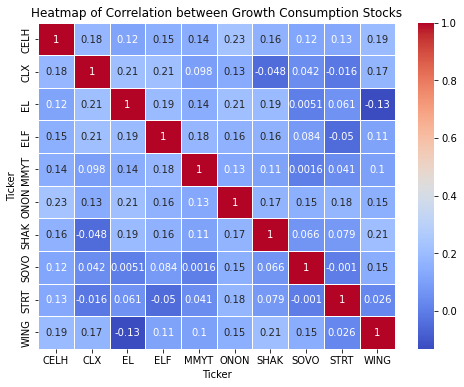

In [3]:
growth_healthcare_corr = healthcare_growth_daily_return.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(growth_healthcare_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation between Growth Consumption Stocks')
plt.show()

Text(0, 0.5, 'Total Returns')

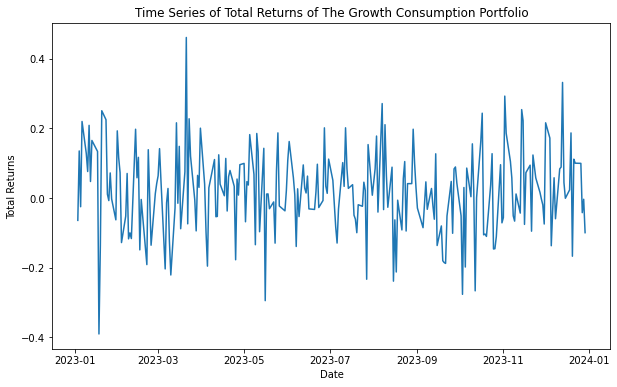

In [4]:
healthcare_growth_daily_return['Total Return'] = healthcare_growth_daily_return.sum(axis=1)
plt.figure(figsize=(10, 6))  # Set the figure size for better readability

# Plot each time series
plt.plot(healthcare_growth_daily_return['Total Return'])
plt.title('Time Series of Total Returns of The Growth Consumption Portfolio')
plt.xlabel('Date')
plt.ylabel('Total Returns')

<Figure size 720x432 with 0 Axes>

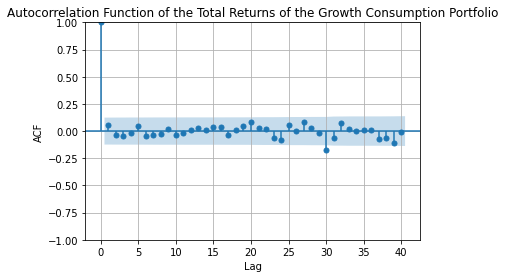

In [5]:
plt.figure(figsize=(10, 6))
plot_acf(healthcare_growth_daily_return.iloc[:,-1], lags=40) 
plt.title('Autocorrelation Function of the Total Returns of the Growth Consumption Portfolio')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

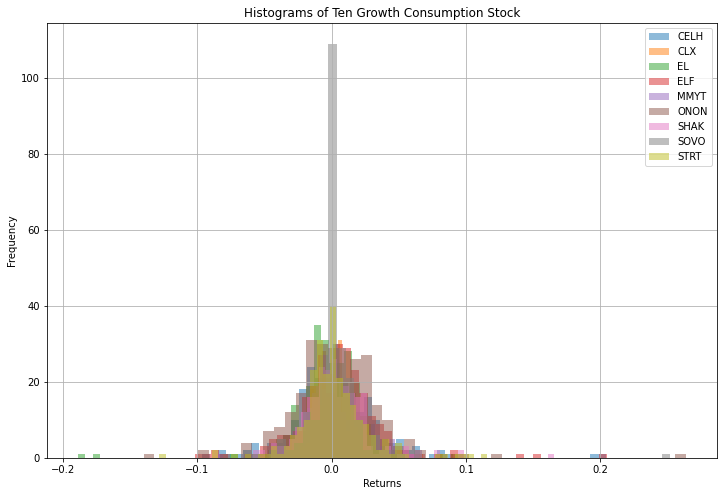

In [6]:
healthcare_growth_daily_return = healthcare_growth_daily_return.iloc[:,0:9]
plt.figure(figsize=(12, 8))
for col in healthcare_growth_daily_return.columns:
    plt.hist(healthcare_growth_daily_return[col], bins=50, alpha=0.5, label=col)

plt.title('Histograms of Ten Growth Consumption Stock')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
value_stock_health = ['CALM', 'CASY', 'COKE', 'DECK', 'F', 'LANC', 'LOPE', 'LRN', 'ULTA', 'YUMC']
start_date = '2022-12-30'
healthcare_value_data = yf.download(value_stock_health, start=start_date)['Adj Close']
healthcare_value_daily_return = healthcare_value_data.pct_change().loc['2022-12-30': '2023-12-29',:]
benchmark = yf.download('^OEX', start=start_date)['Adj Close']

healthcare_value_daily_return = healthcare_value_daily_return.iloc[1:healthcare_growth_daily_return.shape[0],:]
healthcare_value_daily_return.index.name = None
healthcare_value_daily_return

[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


Ticker,CALM,CASY,COKE,DECK,F,LANC,LOPE,LRN,ULTA,YUMC
2023-01-03,0.019100,-0.015155,-0.069678,-0.024877,0.004299,0.022706,0.010600,0.058504,0.005458,0.032388
2023-01-04,0.031357,-0.006246,0.019595,0.001824,0.028253,-0.001586,0.016576,-0.024766,0.025210,0.039525
2023-01-05,-0.023938,-0.008972,-0.004589,0.013181,0.019983,-0.007148,0.017503,0.019201,0.011209,-0.010401
2023-01-06,-0.016291,0.024632,0.033549,0.006303,0.026939,0.007599,0.026075,-0.018839,-0.005624,-0.000345
2023-01-09,-0.041674,0.002153,-0.018980,0.020827,0.008744,-0.016026,0.002559,0.013317,-0.002941,0.016029
...,...,...,...,...,...,...,...,...,...,...
2023-12-21,0.015574,0.016962,0.015211,0.004766,0.045763,-0.014249,0.006767,-0.005712,-0.000209,0.027207
2023-12-22,0.011234,-0.000694,0.022182,-0.014827,0.000810,0.006116,0.009410,0.009125,-0.012797,0.001445
2023-12-26,-0.001234,-0.004054,0.021196,-0.008231,0.008097,0.005096,-0.000421,0.002847,0.012772,-0.002645
2023-12-27,0.000706,0.006711,0.021100,-0.000320,-0.004819,0.001222,-0.007363,-0.002004,0.012317,0.005545


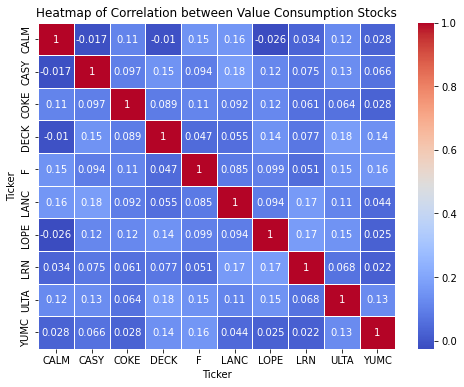

In [8]:
value_healthcare_corr = healthcare_value_daily_return.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(value_healthcare_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation between Value Consumption Stocks')
plt.show()

Text(0, 0.5, 'Total Returns')

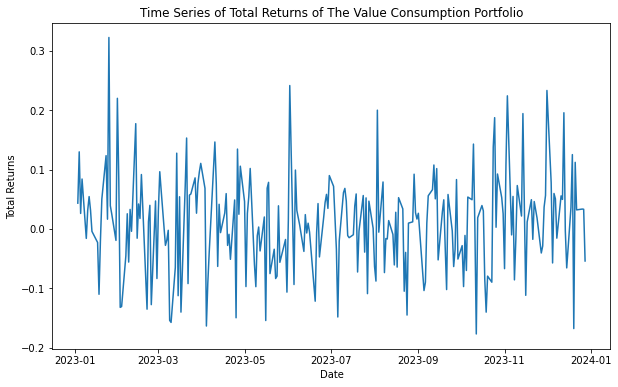

In [9]:
healthcare_value_daily_return['Total Return'] = healthcare_value_daily_return.sum(axis=1)
plt.figure(figsize=(10, 6))  # Set the figure size for better readability

# Plot each time series
plt.plot(healthcare_value_daily_return['Total Return'])
plt.title('Time Series of Total Returns of The Value Consumption Portfolio')
plt.xlabel('Date')
plt.ylabel('Total Returns')

<Figure size 720x432 with 0 Axes>

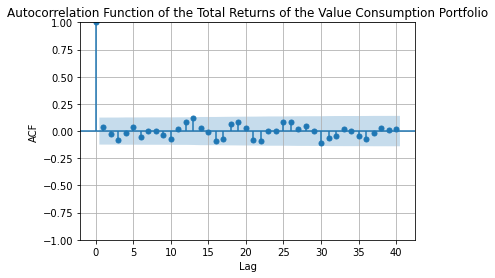

In [10]:
plt.figure(figsize=(10, 6))
plot_acf(healthcare_value_daily_return.iloc[:,-1], lags=40) 
plt.title('Autocorrelation Function of the Total Returns of the Value Consumption Portfolio')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

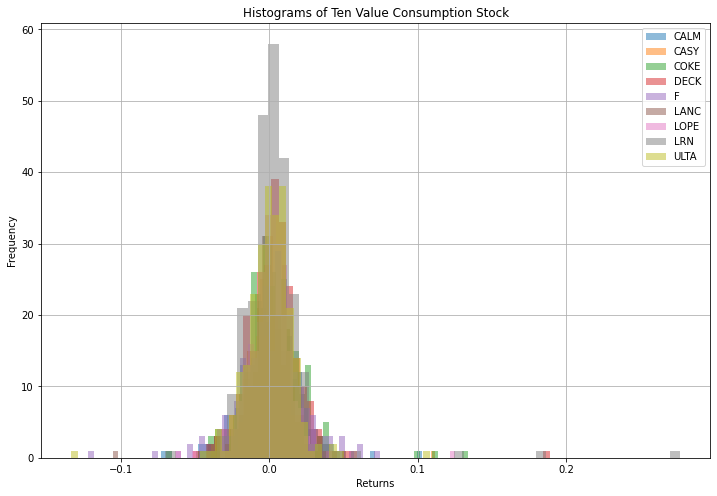

In [11]:
healthcare_value_daily_return = healthcare_value_daily_return.iloc[:,0:9]
plt.figure(figsize=(12, 8))
for col in healthcare_value_daily_return.columns:
    plt.hist(healthcare_value_daily_return[col], bins=50, alpha=0.5, label=col)

plt.title('Histograms of Ten Value Consumption Stock')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()